In [61]:
import pandas as pd
import missingno as msno
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('alzheimer.csv')

In [3]:
df

,PatientID,Domain,Age,BMI,HeartRate,BloodPressure,Cholesterol,CognitiveTestScore,StressMobilityTestScore,RiskLevel,FamilyHistoryDementia,TreatmentResponse
0,P000001,Orthopedics,62.0,28.09,69.0,115.0,206.0,82.78,59.68,High Risk,No,Stable
1,P000002,Orthopedics,19.0,22.83,78.0,116.0,196.0,76.00,60.13,Low Risk,No,Improved
2,P000003,Pediatrics,18.0,27.40,71.0,116.0,200.0,58.52,68.76,Low Risk,Yes,Deteriorated
3,P000004,Pediatrics,47.0,27.81,78.0,105.0,176.0,83.56,70.71,Medium Risk,Yes,Improved
4,P000005,Neurology,38.0,17.92,69.0,113.0,208.0,74.45,76.36,High Risk,No,Stable
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,P029996,Cardiology,30.0,29.28,65.0,138.0,286.0,80.59,81.70,Medium Risk,No,Improved
29996,P029997,Orthopedics,42.0,34.00,68.0,117.0,190.0,62.90,69.58,Low Risk,No,Improved
29997,P029998,Pediatrics,69.0,22.87,59.0,107.0,212.0,82.72,50.81,Low Risk,No,Stable
29998,P029999,Pediatrics,42.0,29.74,74.0,115.0,191.0,74.63,63.08,High Risk,No,Improved


In [4]:
df.drop(columns=['PatientID','Domain'], inplace=True)

In [5]:
df

,Age,BMI,HeartRate,BloodPressure,Cholesterol,CognitiveTestScore,StressMobilityTestScore,RiskLevel,FamilyHistoryDementia,TreatmentResponse
0,62.0,28.09,69.0,115.0,206.0,82.78,59.68,High Risk,No,Stable
1,19.0,22.83,78.0,116.0,196.0,76.00,60.13,Low Risk,No,Improved
2,18.0,27.40,71.0,116.0,200.0,58.52,68.76,Low Risk,Yes,Deteriorated
3,47.0,27.81,78.0,105.0,176.0,83.56,70.71,Medium Risk,Yes,Improved
4,38.0,17.92,69.0,113.0,208.0,74.45,76.36,High Risk,No,Stable
...,...,...,...,...,...,...,...,...,...,...
29995,30.0,29.28,65.0,138.0,286.0,80.59,81.70,Medium Risk,No,Improved
29996,42.0,34.00,68.0,117.0,190.0,62.90,69.58,Low Risk,No,Improved
29997,69.0,22.87,59.0,107.0,212.0,82.72,50.81,Low Risk,No,Stable
29998,42.0,29.74,74.0,115.0,191.0,74.63,63.08,High Risk,No,Improved


<Figure size 1000x1200 with 0 Axes>

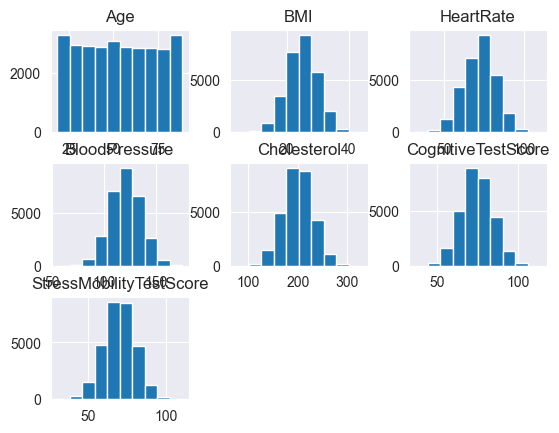

In [8]:
plt.figure(figsize=(10,12))
df.hist()
plt.show()

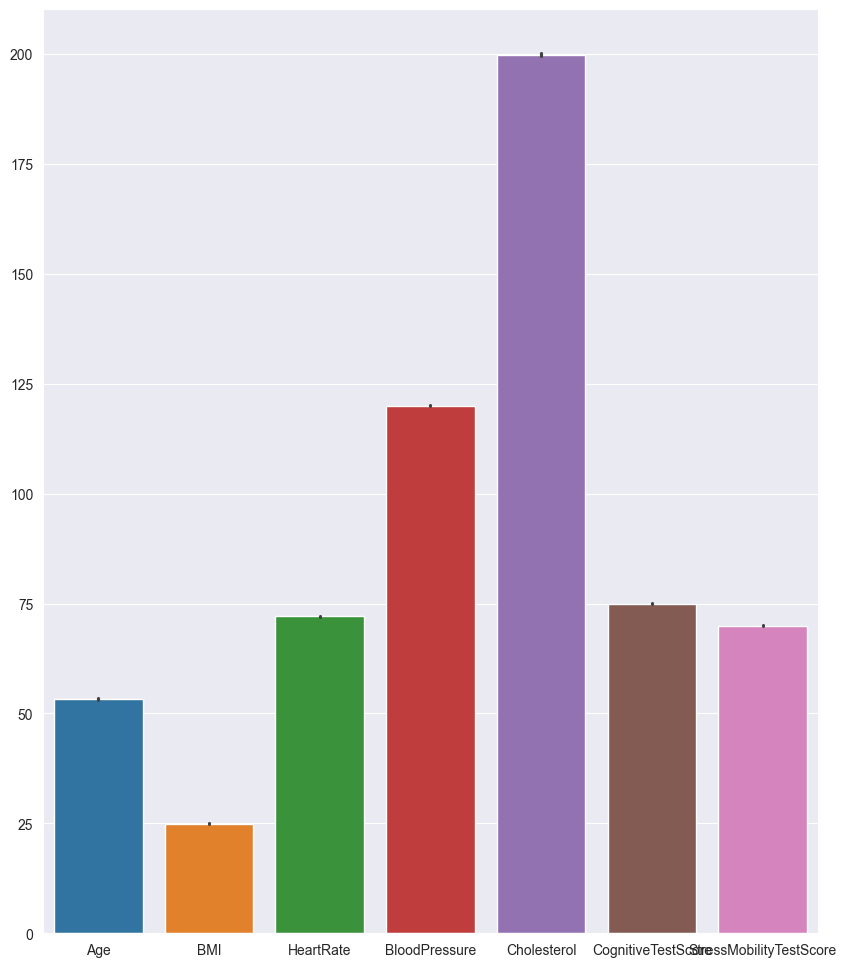

In [15]:
plt.figure(figsize=(10,12))
sns.barplot(df)
plt.show()

In [16]:
df.isnull().sum()

Age                        200
BMI                        200
HeartRate                   50
BloodPressure              200
Cholesterol                200
CognitiveTestScore          50
StressMobilityTestScore    200
RiskLevel                    0
FamilyHistoryDementia        0
TreatmentResponse            0
dtype: int64

In [19]:
missing_values_percentage = df.isnull().sum() / len(df)
missing_values_percentage * 100

Age                        0.666667
BMI                        0.666667
HeartRate                  0.166667
BloodPressure              0.666667
Cholesterol                0.666667
CognitiveTestScore         0.166667
StressMobilityTestScore    0.666667
RiskLevel                  0.000000
FamilyHistoryDementia      0.000000
TreatmentResponse          0.000000
dtype: float64

In [21]:
df['Age'].count()

29800

In [22]:
df

,Age,BMI,HeartRate,BloodPressure,Cholesterol,CognitiveTestScore,StressMobilityTestScore,RiskLevel,FamilyHistoryDementia,TreatmentResponse
0,62.0,28.09,69.0,115.0,206.0,82.78,59.68,High Risk,No,Stable
1,19.0,22.83,78.0,116.0,196.0,76.00,60.13,Low Risk,No,Improved
2,18.0,27.40,71.0,116.0,200.0,58.52,68.76,Low Risk,Yes,Deteriorated
3,47.0,27.81,78.0,105.0,176.0,83.56,70.71,Medium Risk,Yes,Improved
4,38.0,17.92,69.0,113.0,208.0,74.45,76.36,High Risk,No,Stable
...,...,...,...,...,...,...,...,...,...,...
29995,30.0,29.28,65.0,138.0,286.0,80.59,81.70,Medium Risk,No,Improved
29996,42.0,34.00,68.0,117.0,190.0,62.90,69.58,Low Risk,No,Improved
29997,69.0,22.87,59.0,107.0,212.0,82.72,50.81,Low Risk,No,Stable
29998,42.0,29.74,74.0,115.0,191.0,74.63,63.08,High Risk,No,Improved


In [24]:
encoder = LabelEncoder()

df['RiskLevel'] = encoder.fit_transform(df['RiskLevel'])
df['FamilyHistoryDementia'] = encoder.fit_transform(df['FamilyHistoryDementia'])
df['TreatmentResponse'] = encoder.fit_transform(df['TreatmentResponse'])

In [25]:
df['TreatmentResponse'].unique()

array([2, 1, 0])

In [27]:
missing_values_percentage * 100

Age                        0.666667
BMI                        0.666667
HeartRate                  0.166667
BloodPressure              0.666667
Cholesterol                0.666667
CognitiveTestScore         0.166667
StressMobilityTestScore    0.666667
RiskLevel                  0.000000
FamilyHistoryDementia      0.000000
TreatmentResponse          0.000000
dtype: float64

In [28]:
df

,Age,BMI,HeartRate,BloodPressure,Cholesterol,CognitiveTestScore,StressMobilityTestScore,RiskLevel,FamilyHistoryDementia,TreatmentResponse
0,62.0,28.09,69.0,115.0,206.0,82.78,59.68,0,0,2
1,19.0,22.83,78.0,116.0,196.0,76.00,60.13,1,0,1
2,18.0,27.40,71.0,116.0,200.0,58.52,68.76,1,1,0
3,47.0,27.81,78.0,105.0,176.0,83.56,70.71,2,1,1
4,38.0,17.92,69.0,113.0,208.0,74.45,76.36,0,0,2
...,...,...,...,...,...,...,...,...,...,...
29995,30.0,29.28,65.0,138.0,286.0,80.59,81.70,2,0,1
29996,42.0,34.00,68.0,117.0,190.0,62.90,69.58,1,0,1
29997,69.0,22.87,59.0,107.0,212.0,82.72,50.81,1,0,2
29998,42.0,29.74,74.0,115.0,191.0,74.63,63.08,0,0,1


In [29]:
df.isnull().sum()

Age                        200
BMI                        200
HeartRate                   50
BloodPressure              200
Cholesterol                200
CognitiveTestScore          50
StressMobilityTestScore    200
RiskLevel                    0
FamilyHistoryDementia        0
TreatmentResponse            0
dtype: int64

# 1 nacin

In [43]:
imputer = SimpleImputer(strategy='mean')

cols = ['Age', 'BMI', 'HeartRate', 'BloodPressure', 'Cholesterol', 'CognitiveTestScore', 'StressMobilityTestScore']
df[cols] = df[cols].apply(lambda col : imputer.fit_transform(col.values.reshape(-1,1)).flatten())

In [44]:
df.isnull().sum()

Age                        0
BMI                        0
HeartRate                  0
BloodPressure              0
Cholesterol                0
CognitiveTestScore         0
StressMobilityTestScore    0
RiskLevel                  0
FamilyHistoryDementia      0
TreatmentResponse          0
dtype: int64

# 2 nacin

In [ ]:
simple_imputer = SimpleImputer(strategy='mean')

df['Age'] = imputer.fit_transform(df['Age'])
df['BMI'] = imputer.fit_transform(df['BMI'])
df['HeartRate'] = imputer.fit_transform(df['HeartRate'])
df['BloodPressure'] = imputer.fit_transform(df['BloodPressure'])
df['Cholesterol'] = imputer.fit_transform(df['Cholesterol'])
df['CognitiveTestScore'] = imputer.fit_transform(df['CognitiveTestScore'])
df['StressMobilityTestScore'] = imputer.fit_transform(df['StressMobilityTestScore'])

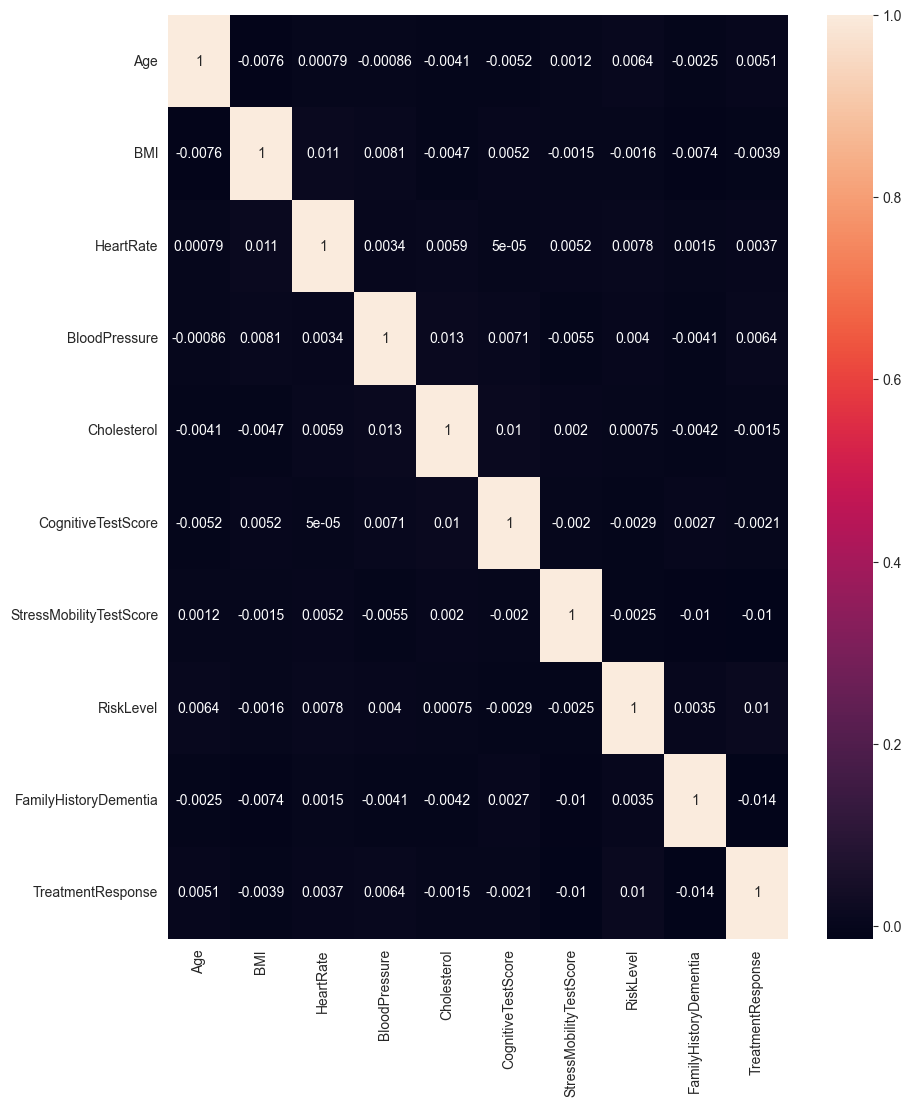

In [45]:
correlation_features = df.corr()

plt.figure(figsize=(10,12))
sns.heatmap(correlation_features, annot=True)
plt.show()

In [48]:
x = df.drop(columns='RiskLevel')
y = df['RiskLevel']

In [52]:
x

,Age,BMI,HeartRate,BloodPressure,Cholesterol,CognitiveTestScore,StressMobilityTestScore,FamilyHistoryDementia,TreatmentResponse
0,62.0,28.09,69.0,115.0,206.0,82.78,59.68,0,2
1,19.0,22.83,78.0,116.0,196.0,76.00,60.13,0,1
2,18.0,27.40,71.0,116.0,200.0,58.52,68.76,1,0
3,47.0,27.81,78.0,105.0,176.0,83.56,70.71,1,1
4,38.0,17.92,69.0,113.0,208.0,74.45,76.36,0,2
...,...,...,...,...,...,...,...,...,...
29995,30.0,29.28,65.0,138.0,286.0,80.59,81.70,0,1
29996,42.0,34.00,68.0,117.0,190.0,62.90,69.58,0,1
29997,69.0,22.87,59.0,107.0,212.0,82.72,50.81,0,2
29998,42.0,29.74,74.0,115.0,191.0,74.63,63.08,0,1


In [51]:
y

0        0
1        1
2        1
3        2
4        0
        ..
29995    2
29996    1
29997    1
29998    0
29999    2
Name: RiskLevel, Length: 30000, dtype: int64

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2)

In [54]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [62]:
model = XGBClassifier() # max_depth=5, min_child_weight=1, n_estimators=100, n_jobs=-1, learning_rate=0.1

model.fit(x_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [63]:
y_predict = model.predict(x_test_scaled)

In [65]:
model2 = DecisionTreeClassifier(max_depth=3)

model2.fit(x_train_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

In [66]:
y_pred = model2.predict(x_test_scaled)

In [64]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.33      0.32      0.32      1930
           1       0.36      0.36      0.36      2113
           2       0.33      0.33      0.33      1957

    accuracy                           0.34      6000
   macro avg       0.34      0.34      0.34      6000
weighted avg       0.34      0.34      0.34      6000



In [67]:
print(classification_report(y_test, y_pred)) # od model2

              precision    recall  f1-score   support

           0       0.29      0.02      0.03      1930
           1       0.37      0.53      0.43      2113
           2       0.33      0.47      0.39      1957

    accuracy                           0.35      6000
   macro avg       0.33      0.34      0.28      6000
weighted avg       0.33      0.35      0.29      6000

